In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data=pd.read_csv("E:\\py practise\\machine learning\\csv files\\ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Unnamed: 5
0,15624510,Male,19,19000,0,NaN
1,15810944,Male,35,20000,0,NaN
2,15668575,Female,26,43000,0,NaN
3,15603246,Female,27,57000,0,NaN
4,15804002,Male,19,76000,0,NaN


In [61]:
data.drop(["User ID","Unnamed: 5"],axis=1,inplace=True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
data_x=data.iloc[:,:-1]
data_y=data.iloc[:,-1]
print(data_x.head())
print(data_y.head())

   Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [73]:
gender=pd.get_dummies(data_x["Gender"],drop_first=True)
data_x.drop(["Gender"],axis=1,inplace=True)
data_x.head()
data_x=pd.concat([data_x,gender],axis=1)
data_x.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [74]:
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.2)

In [76]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)

In [86]:
p=5
knn=KNeighborsClassifier(n_neighbors=p)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
test_prediction=knn.predict(test_x)
print("predicted:",test_prediction)
print("actual   :",test_y.values)

predicted: [0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 0]
actual   : [0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0]


In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [89]:
print("confusion matrix:",confusion_matrix(test_prediction,test_y.values))
print("accuracy score:",accuracy_score(test_prediction,test_y.values))

confusion matrix: [[47  3]
 [ 6 24]]
accuracy score: 0.8875


In [90]:
error_rate=list()
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    predicted=knn.predict(test_x)
    error_rate.append(np.mean(predicted!=test_y))

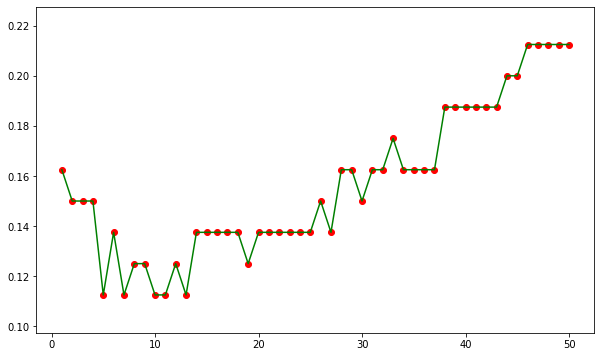

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(range(1,51),error_rate,color="red")
plt.plot(range(1,51),error_rate,color="green")
plt.show()

In [101]:
knn1=KNeighborsClassifier(n_neighbors=10)
knn1.fit(train_x,train_y)
k_10=knn.predict(test_x)

In [102]:
confusion_matrix(k_10,test_y)

array([[47,  3],
       [ 6, 24]], dtype=int64)